In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

In [2]:
# Read the Dataset
df = pd.read_csv("top250-00-19.csv")
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


## checking nulls

In [3]:
df.isna().sum()

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

In [4]:
df[df['Market_value'].isnull()]['Season'].value_counts()

2001-2002    250
2000-2001    248
2002-2003    244
2003-2004    242
2004-2005    189
2005-2006     28
2006-2007     20
2007-2008     13
2008-2009      7
2010-2011      4
2017-2018      3
2018-2019      3
2012-2013      2
2013-2014      2
2009-2010      2
2014-2015      1
2016-2017      1
2011-2012      1
Name: Season, dtype: int64

## as we can see most of the null data in the estimated market value of the player is before 2006, as the football world didn't have as much technology as we do nowadays

<AxesSubplot:>

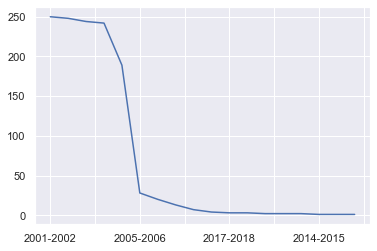

In [5]:
df[df['Market_value'].isnull()]['Season'].value_counts().plot(kind='line')

In [6]:
ts_df=df[['Season','Transfer_fee']]
ts2= ts_df.groupby('Season').mean()

<AxesSubplot:xlabel='Season'>

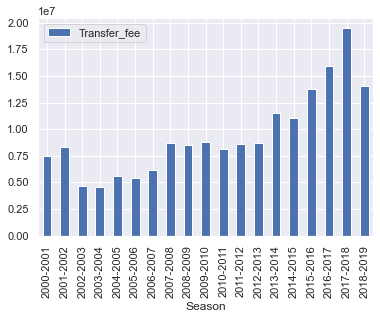

In [7]:
ts2.plot(kind='bar')

## As we can see as we move along with the years the average transfer fee per season increases because the world keeps getting more expensive and costly as we go through the years(due to inflation and so on)

<AxesSubplot:xlabel='Position'>

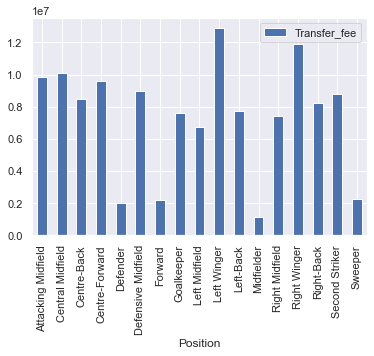

In [8]:
pos_df=df[['Position','Transfer_fee']]
pos= pos_df.groupby('Position').mean()
pos.plot(kind='bar')

# As we can see usually the wingers are the positions that cost more to buy

<AxesSubplot:xlabel='Age'>

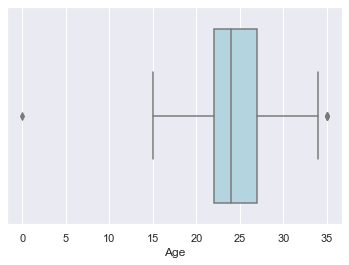

In [28]:
age_df=df[['Age','Transfer_fee']]
age= age_df.groupby('Age').mean()
# age.plot(kind='bar')
sns.boxplot(x=age_df['Age'], color='lightblue')
## There is an obvious outlier

/var/folders/0h/m5s3gx2s1wd9wnl5mm50m12m0000gn/T/ipykernel_97131/1022143103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df.drop(age_df[age_df['Age']<10].index, inplace=True)


<AxesSubplot:xlabel='Age'>

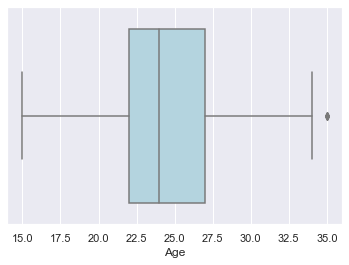

In [30]:
age_df.drop(age_df[age_df['Age']<10].index, inplace=True)
#Check
sns.boxplot(x=age_df['Age'], color='lightblue')

<AxesSubplot:xlabel='Age'>

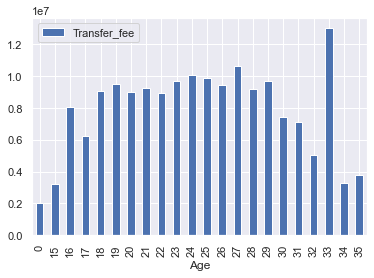

In [31]:
age.plot(kind='bar')

# the players cost more when they age between 19-29 as these count as thier prime days

<AxesSubplot:ylabel='League_from'>

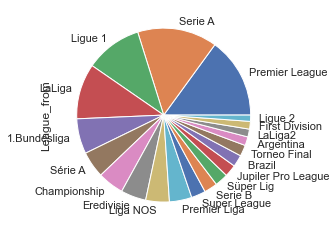

In [46]:
# lg_df=df[['League_from','Transfer_fee']]
# lg= lg_df.groupby('League_from').mean()
# lg.plot(kind='bar')
lg=df['League_from'].value_counts()[:20]
lg.plot(kind='pie')

## The top 5 legaues have got almost the same amount of transfers if not more than the other leagues combined